`--- Day 5: Alchemical Reduction ---`

In [1]:
import unittest
import re

In [2]:
polymer = open('input.txt').read().strip()
print(f'polymer length is {len(polymer)}\npolymer = {polymer[:10]}...{polymer[-10:]}')

polymer length is 50000
polymer = bBkKQqgaAG...FJnZNnwxXW


# Construct tests

For example:
```
    In aA, a and A react, leaving nothing behind.
    In abBA, bB destroys itself, leaving aA. As above, this then destroys itself, leaving nothing.
    In abAB, no two adjacent units are of the same type, and so nothing happens.
    In aabAAB, even though aa and AA are of the same type, their polarities match, and so nothing happens.
```
Now, consider a larger example, dabAcCaCBAcCcaDA:
```
dabAcCaCBAcCcaDA  The first 'cC' is removed.
dabAaCBAcCcaDA    This creates 'Aa', which is removed.
dabCBAcCcaDA      Either 'cC' or 'Cc' are removed (the result is the same).
dabCBAcaDA        No further actions can be taken.
```
After all possible reactions, the resulting polymer contains 10 units.

In [3]:
testdata = {              'aA': '',
                        'abBA': '',
                        'abAB': 'abAB',
                      'aabAAB': 'aabAAB',
            'dabAcCaCBAcCcaDA': 'dabCBAcaDA'}

testdata2 = {'dabAcCaCBAcCcaDA': 'dabAaCBAcCcaDA',
               'dabAaCBAcCcaDA': 'dabCBAcCcaDA',
                 'dabCBAcCcaDA': 'dabCBAcaDA',
                   'dabCBAcaDA': 'dabCBAcaDA'}

testdata3 = {'dabAcCaCBAcCcaDA': 'dabAaCBAcaDA',
               'dabAaCBAcCcaDA': 'dabCBAcaDA',
                   'dabCBAcaDA': 'dabCBAcaDA'}

In [4]:
class TestIt(unittest.TestCase):
    # part 1
    def test_poly_reduce(self):
        for reducer in reducers:
            for test, res in testdata.items():
                with self.subTest(poly=test, reducer=reducer):
                    self.assertEqual(poly_reduce(test, reducer=reducer), res)
                
    def test_reduce_first(self):
        for test, res in testdata2.items():
            with self.subTest(poly=test):
                self.assertEqual(reduce_first(test), res)
                
    def test_reduce_all(self):
        for test, res in testdata3.items():
            with self.subTest(poly=test):
                self.assertEqual(reduce_all(test), res)
        

# Implement part 1 solution

In [63]:
rel = []
for c in 'abcdefghijklmnopqrstuvwxyz':
    rel.append(c + c.upper())
    rel.append(c.upper() + c)

reactive_units_re = re.compile('|'.join(rel))

def reduce_first(poly):
    return re.sub(reactive_units_re, '', poly, count=1)

def reduce_all(poly):
    return re.sub(reactive_units_re, '', poly)

def reduce_sequential(poly):
    for r in rel:
        poly = re.sub(r, '', poly)
    return poly

def reduce_str_replace(poly):
    for r in rel:
        poly = poly.replace(r, '')
    return poly

reducers = [reduce_first, reduce_all, reduce_sequential, reduce_str_replace]

def poly_reduce(poly, reducer=reduce_str_replace):
    last_length = len(poly) + 1 # start out with it not equal to len(poly)
    while last_length != len(poly):
        last_length = len(poly)
        poly = reducer(poly)
    return poly

def poly_reduce2(poly):
    path = list()
    rest = list(poly)
    
    while len(rest) > 0:
        path.append(rest.pop())
        while len(path) > 0 and len(rest) > 0:
            #print(len(path), len(rest))
            if path[-1].lower() == rest[-1].lower() and path[-1] != rest[-1]:
                path.pop()
                rest.pop()
            else:
                break
    return len(path)
     

# Run part 1 tests

In [64]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestIt)
unittest.TextTestRunner(verbosity=2).run(suite)

test_poly_reduce (__main__.TestIt) ... ok
test_reduce_all (__main__.TestIt) ... ok
test_reduce_first (__main__.TestIt) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

# Performance checks

In [65]:
test_poly = polymer[:2500]

In [66]:
%%timeit
res = poly_reduce(test_poly, reducer=reduce_sequential)

529 µs ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%%timeit
res = poly_reduce(test_poly, reducer=reduce_all)

660 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
%%timeit
res = poly_reduce(test_poly, reducer=reduce_first)

6.54 ms ± 95.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
%%timeit
res = poly_reduce(test_poly, reducer=reduce_str_replace)

246 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Part 1 answer

In [70]:
%%timeit -n 1 -r 1
print(f'Part 1: {len(poly_reduce(polymer))}')

Part 1: 10598
130 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [71]:
%%timeit -n 1 -r 1
poly_reduce2(polymer)

33.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Part 2

In [58]:
%%timeit
reduced_lengths = []
for c in 'abcdefghijklmnopqrstuvwxyz':
    r = f'[{c}{c.upper()}]' # '[aA]' etc.
    reduced_lengths.append(len(poly_reduce(re.sub(r ,'', polymer))))
print(f'Part 2: {min(reduced_lengths)}')

Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
3.18 s ± 172 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
%%timeit
reduced_lengths = []
for c in 'abcdefghijklmnopqrstuvwxyz':
    r = f'[{c}{c.upper()}]' # '[aA]' etc.
    reduced_lengths.append(poly_reduce2(re.sub(r ,'', polymer)))
print(f'Part 2: {min(reduced_lengths)}')

Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
Part 2: 5312
739 ms ± 97.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Performance analysis

In [14]:
from timeit import Timer
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [15]:
max_l = 100
0 # len(polymer)
n_datapoints = 11

lengths = pd.Series(np.linspace(0, max_l, n_datapoints, dtype=np.int), name='PolymerLength')

data = [lengths]

for fun in reducers:
    print(f'Timing reducer {fun.__name__}...')
    perf = []
    print(f'lengths ', end='')
    for l in lengths:
        print(f'{l} ', end='')
        test_poly = polymer[:l]
        timer = Timer(f'poly_reduce(test_poly, reducer={fun.__name__})', globals=globals())
        iters, time = timer.autorange()
        perf.append(time / iters)
    print(f' - iters={iters}, time={time}')
    data.append(pd.Series(perf, name=fun.__name__))
print()

Timing reducer reduce_first...
lengths 0 10 20 30 40 50 60 70 80 90 100  - iters=10000, time=1.111784491838506
Timing reducer reduce_all...
lengths 0 10 20 30 40 50 60 70 80 90 100  - iters=10000, time=0.2483399678201863
Timing reducer reduce_sequential...
lengths 0 10 20 30 40 50 60 70 80 90 100  - iters=10000, time=1.533697304490687
Timing reducer reduce_str_replace...
lengths 0 10 20 30 40 50 60 70 80 90 100  - iters=10000, time=0.3060591218640454



In [16]:
df = pd.concat(data, axis=1)

In [17]:
df.head()

,PolymerLength,reduce_first,reduce_all,reduce_sequential,reduce_str_replace
0,0,0.000002,0.000002,0.000035,0.000007
1,10,0.000012,0.000006,0.000072,0.000020
2,20,0.000022,0.000009,0.000072,0.000021
3,30,0.000032,0.000011,0.000072,0.000022
4,40,0.000045,0.000014,0.000101,0.000031


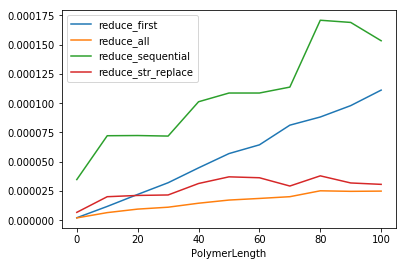

In [18]:
df.plot(x='PolymerLength')

In [19]:
df.to_csv(f'results_{max_l}.csv')

# Algorithm comparison

In [20]:
dfs = [pd.read_csv(f'results_{i}.csv', index_col=0) for i in [100, 1000, 2500, 50000]]

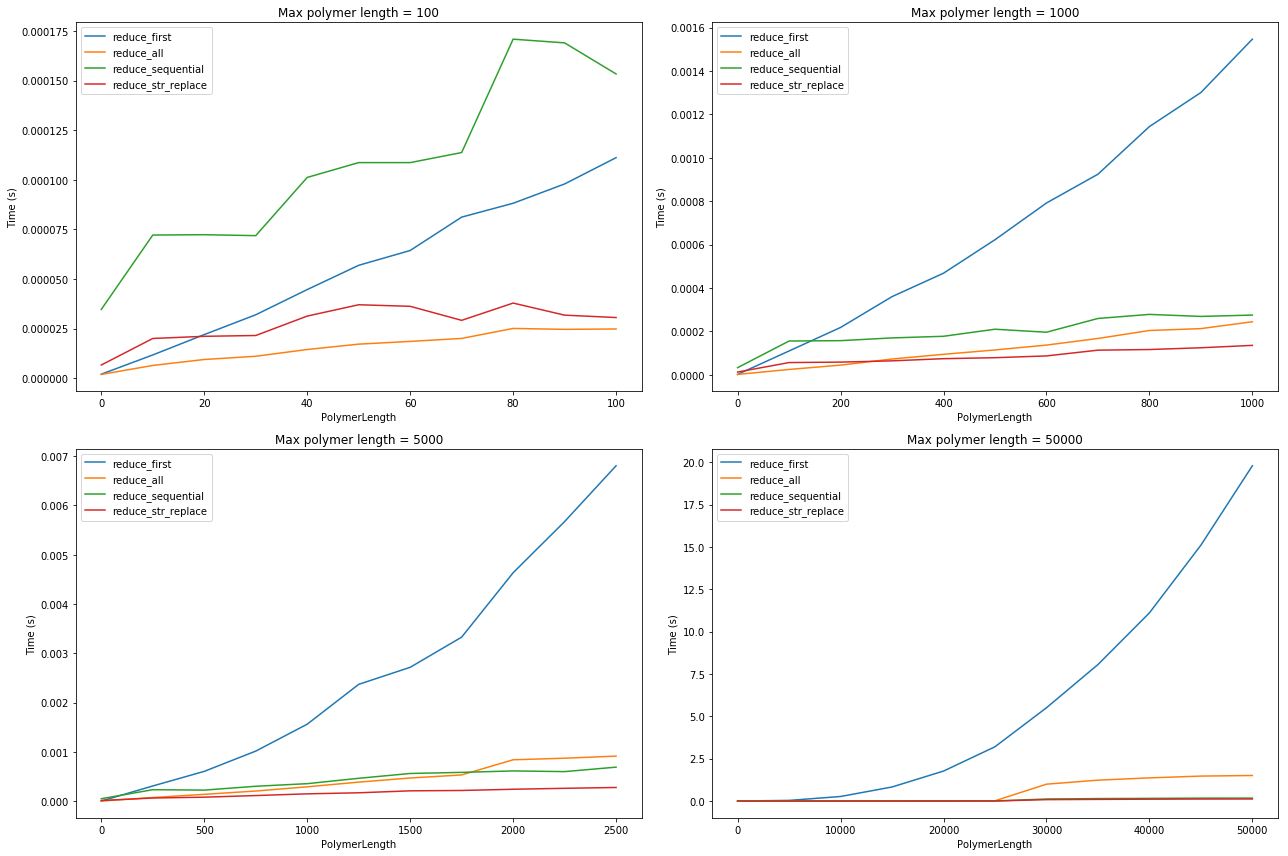

In [21]:
fig, ax = plt.subplots(2, 2, squeeze=True, figsize=(18, 12))
ax = ax.flatten()
for i, sdf in enumerate(dfs):
    sdf.plot(x='PolymerLength', ax=ax[i])
for i, N in enumerate([100, 1000, 5000, 50000]):
    ax[i].set_title(f'Max polymer length = {N}')
    ax[i].set_ylabel('Time (s)')
plt.tight_layout()
plt.savefig('performance_comparison.png')
plt.show()